In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 2d molecular model of random hard discs

Lets put in the two-dimensional space 20 hard discs (radius=1.0) following the only two rules:
- Every disc must be in contact with at least another disc.
- Discs are hard, they can not overlap.

In [5]:
radius = 1.0 
n_discs = 20

positions = np.zeros(shape=(n_discs,2),dtype=float)

for ii in range(1, n_discs):
    done = False
    while done is False:
        disc_in_contact = np.random.randint(0,ii)
        angle = 2*np.pi*np.random.random()
        new_center = 2*radius*np.array([np.cos(angle), np.sin(angle)])+positions[disc_in_contact,:]
        done=True
        for jj in range(ii):
            dist= np.linalg.norm(positions[jj,:]-new_center)
            if dist < 2*radius:
                done=False
                break
        if done is True:
            positions[ii,:]=new_center

Lets show now the figure of the resulting 2D random molecular model.

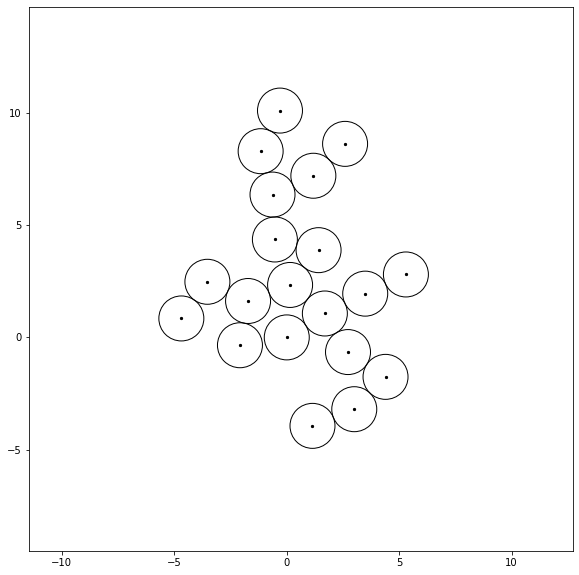

In [6]:
plt.rcParams["figure.figsize"] = (10,10)

ax=plt.gca()
for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

## Voronoi diagrams

Use the coordinates of our previous model, scipy and matplotlib.

In [7]:
from scipy.spatial import Voronoi, voronoi_plot_2d

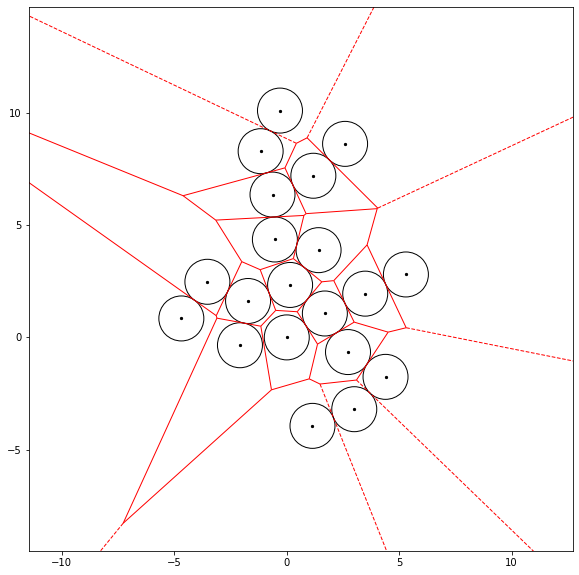

In [8]:
vor = Voronoi(positions, incremental=False)

voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='r', s=4)

ax=plt.gca()
for ii in range(n_discs):
#    x,y = positions[ii,:]
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

# What's the geometrical interpretation of the Voronoi diagram?

Given a set of two or more but a finite number of distinct points (in this case represented by the hard discs) in the Euclidean plane, we associate all locations in that space with the closest member(s) of the point set with respect to the Euclidean distance. The result is a tessellation of the plane into a set of the regions associated with members of the point set. We call this tessellation the planar ordinary Voronoi diagram generated by the point set, and the regions constituting the Voronoi diagram ordinary Voronoi polygons.

what is a tessellation?

Let S be a closed subset of R^m, Si be a closed subset of S and T = (S1,. . . , Sn) (when we deal with an infinite n, we assume that only finitely many S, hit a bounded subset of Rm). If elements in the set T satisfy that Si do not intersect with Sj except in the edges, and that the union of all Si is equal to S then we call the set T a tessellation of S.

Okabe, A.; Boots, B.; and Sugihara, K. Spatial Tessellations: Concepts and Applications of Voronoi Diagrams, 2nd ed. New York: Wiley, 2000.

# Dellanuy triangulation

Use the coordinates of our previous model, scipy and matplotlib.

In [9]:
from scipy.spatial import Delaunay

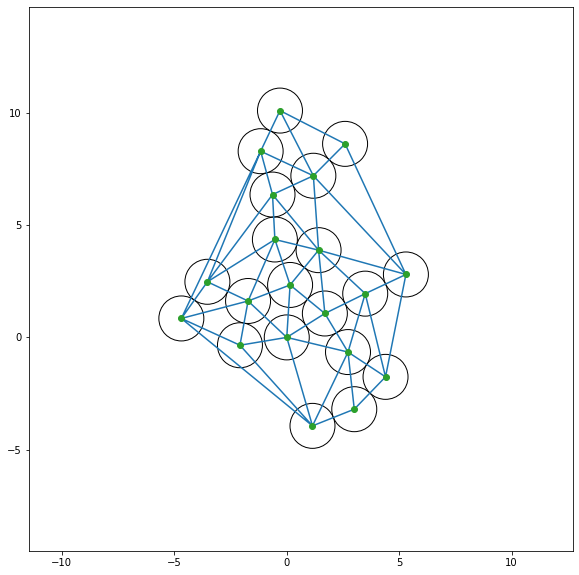

In [10]:
tri = Delaunay(positions)
plt.triplot(positions[:,0], positions[:,1], tri.simplices)

plt.plot(positions[:,0], positions[:,1],'o')


ax=plt.gca()
for ii in range(n_discs):
#    x,y = positions[ii,:]
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])


plt.show()

#What's the geometrical interpretation of the Delaunay triangulation?

Given a Voronoi diagram where generator points are not collinear and their number is three or more but
finite, we join all pairs of generator points whose Voronoi polygons share the common Voronoi edge. 
As a result, we obtain a second tessellation. If this tessellation consists of only triangles, we call it a Delaunay triangulation. If not, we call it a Delaunay pretriangulation. For the Delaunay pretriangulation, we partition non-triangular polygons into triangles by non-intersecting line segments joining the vertices. 
As a result, the Delaunay pretriangulation becomes a triangulation. We also call it a Delaunay triangulation.

Okabe, A.; Boots, B.; and Sugihara, K. Spatial Tessellations: Concepts and Applications of Voronoi Diagrams, 2nd ed. New York: Wiley, 2000.

## Convex hull

Use the coordinates of our previous model, scipy and matplotlib.

In [11]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

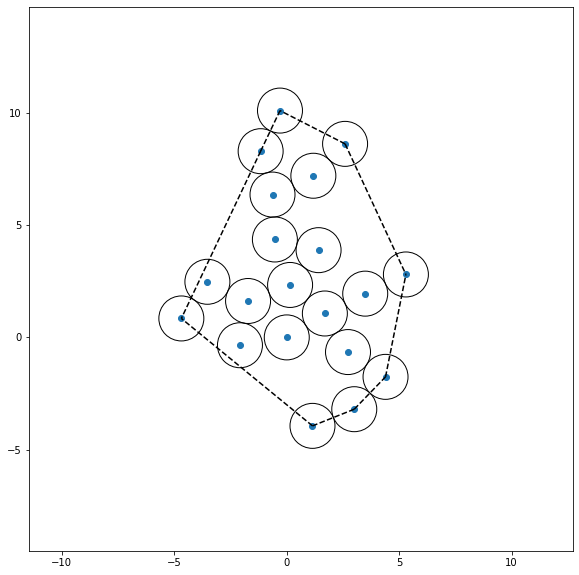

In [12]:
hull = ConvexHull(positions)
plt.plot(positions[:,0], positions[:,1], 'o')

for simplex in hull.simplices:

    plt.plot(positions[simplex, 0], positions[simplex, 1], 'k-',linestyle='--')

ax=plt.gca()
for ii in range(n_discs):
#    x,y = positions[ii,:]
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])

plt.show()

What's the geometrical interpretation of the convex hull?

A convex figure does not have holes or its boundary does not bend into the figure. Formally, if for any two points x1 and x2, in A the line segment joining the points is contained in A,then we call the set A a convex set; otherwise, a non-convex set.

A formal definition of the convex hull of a set A: consider all possible convex sets that contain the set A. The number of such sets is infinite. We take the intersection of all such convex sets. Then the resulting set is called the convex hull of the set A. Since the intersection of convex sets is a convex set, the convex hull of the set A is a convex set. Moreover, it is the ‘smallest’ convex set that contains the set A. Obviously, if the set A is a convex set, then the convex hull of A is A itself.

As a special type of a convex hull, we define a simplex. A simplex in Rm is the convex hull of any set of 
m + l points which do not all lie on one hyperplane in R^m. If m = 0, the simplex is a point itself, called the zeroth-order simplex; if m = 1, the simplex is the straight line segment connecting two points, called the first-order simplex ; if m = 2, the simplex is a triangle, called the second-order simplex; if m = 3, the simplex is a tetrahedron, called the third-order simplex, and so forth. 

The second-order simplex it's related with the Delaunay triangulation on a plane as well as to the Voronoi diagram.

One of the properties of the Delaunay triangulation is that: The external Delaunay edges in a Delaunay triangulation of P constitute the boundary of the convex hull of P. Being P the set of all generator points, in this case represented by the hard discs.


Okabe, A.; Boots, B.; and Sugihara, K. Spatial Tessellations: Concepts and Applications of Voronoi Diagrams, 2nd ed. New York: Wiley, 2000.